In [1]:
import sqlite3 as sq
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re

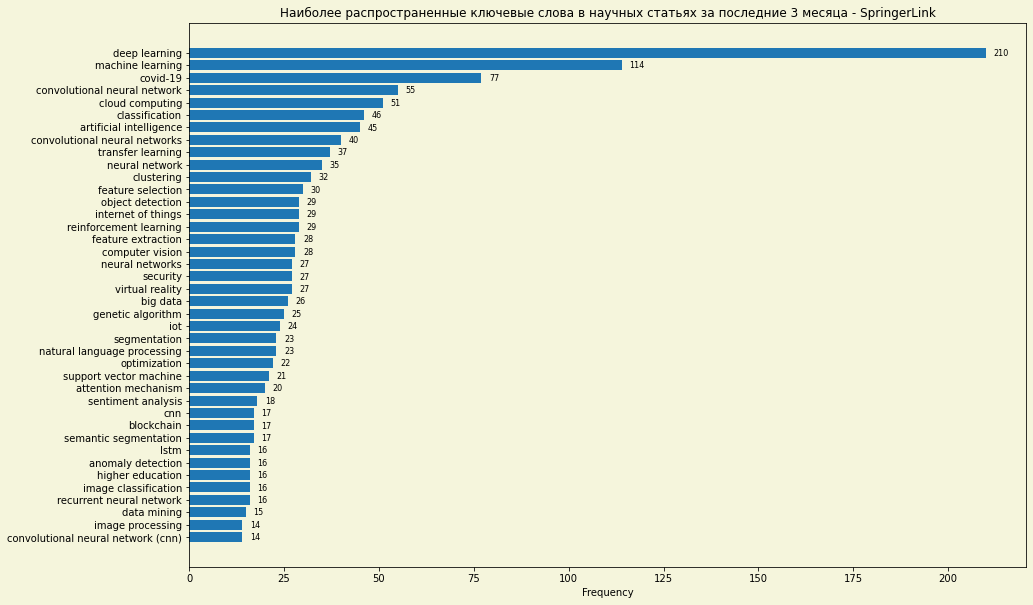

In [2]:
with sq.connect("E:\\frontier.db") as con:
    cur = con.cursor()
    cur.execute("""CREATE TABLE IF NOT EXISTS SpringerLink (
    name TEXT,
    data TEXT,
    keywords TEXT,
    url TEXT)
    """)
    cur.execute("""Select keywords From SpringerLink
    where data like '2021%' and (data like '%-04-%' or data like '%-05-%' or data like '%-06-%') """)
    result = cur.fetchall()
    
    #DELETE FROM SpringerLink WHERE keywords = 'NONE'
    
#     for i in range(len(all_title)):
#         #print(i)
#       #  print(all_title[i], all_time_pub[i], all_keywords_join[i])
#         cur.execute("""INSERT INTO articles(name, data, keywords, url)
#            VALUES(?, ?, ?, ?)""", (all_title[i], all_time_pub[i], all_keywords_join[i], links_DB[i]))


all_words = []
for i in range(len(result)):
    all_words.extend(result[i][0].split(', '))

for i in range(len(all_words)):
    all_words[i] = all_words[i].lower()
len(all_words)


e = re.compile('\d\d[a-z]\d\d')
#count = 0
for i, key in enumerate(all_words):
  #  print(i)
    if e.findall(key):
        #count += 1
        all_words[i] = ''

all_words = [x for x in all_words if x]

counter = Counter(all_words)
most_com = counter.most_common()

most_com_words, most_com_index = [], []
for i in range(len(most_com)):
  #  print(most_com[i][1])
    most_com_words.append(most_com[i][0])
    most_com_index.append(most_com[i][1])
    
size = 5
fig, ax = plt.subplots(figsize=(3 * size, 2 * size))
# y_pos = np.arange(len(grams))
# performance = gram_frame["frequencies"]
begin, end = 0, 40
#print(most_com_index[begin:end], most_com_words[begin:end])
ax.barh(np.arange(begin, end), most_com_index[begin:end])
for i, v in enumerate(most_com_index[begin:end]):
    ax.text(v + 2, i + .25, str(v), color='black', fontsize=8)

#ax.text(10, 10, most_com_index[begin:end])
ax.set_yticks(np.arange(begin, end))
ax.set_yticklabels(most_com_words[begin:end])
# ax.set_xticks(most_com_index[begin:end])
# ax.set_xticklabels(most_com_index[begin:end])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_facecolor("beige")
fig.patch.set_facecolor('beige')
ax.set_xlabel('Frequency')
ax.set_title('Наиболее распространенные ключевые слова в научных статьях за последние 3 месяца - SpringerLink')

plt.show()

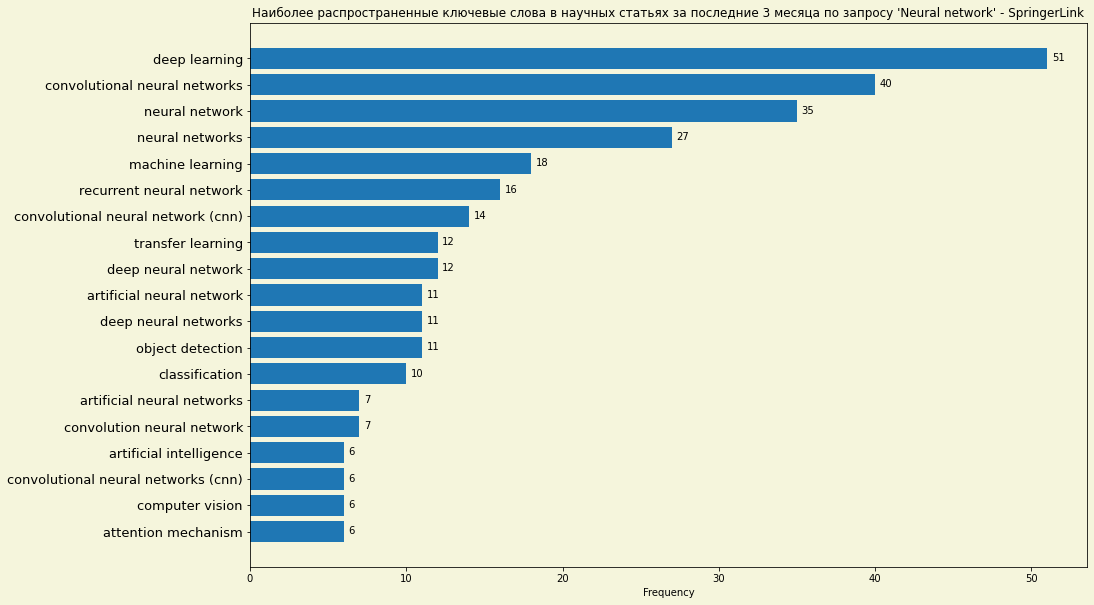

In [3]:
with sq.connect("E:\\frontier.db") as con:
    cur = con.cursor()
    cur.execute("""CREATE TABLE IF NOT EXISTS SpringerLink (
    name TEXT,
    data TEXT,
    keywords TEXT,
    url TEXT)
    """)
    cur.execute("""Select keywords From SpringerLink
    where keywords like '%Neural network%' and data like '2021%' and
    (data like '%-04-%' or data like '%-05-%' or data like '%-06-%')""")
    result = cur.fetchall()


all_words = []
for i in range(len(result)):
    all_words.extend(result[i][0].split(', '))

for i in range(len(all_words)):
    all_words[i] = all_words[i].lower()
len(all_words)


e = re.compile('\d\d[a-z]\d\d')
#count = 0
for i, key in enumerate(all_words):
  #  print(i)
    if e.findall(key):
        #count += 1
        all_words[i] = ''

all_words = [x for x in all_words if x]

counter = Counter(all_words)
most_com = counter.most_common()

most_com_words, most_com_index = [], []
for i in range(len(most_com)):
  #  print(most_com[i][1])
    most_com_words.append(most_com[i][0])
    most_com_index.append(most_com[i][1])
    
size = 5
fig, ax = plt.subplots(figsize=(3 * size, 2 * size))

begin, end = 1, 20

ax.barh(np.arange(begin, end), most_com_index[begin:end])
for i, v in enumerate(most_com_index[begin:end]):
    ax.text(v + 0.3, i + 1.1, str(v), color='black', fontsize=10)

ax.set_yticks(np.arange(begin, end))
ax.set_yticklabels(most_com_words[begin:end], fontsize=13)

ax.invert_yaxis() 
ax.set_facecolor("beige")
fig.patch.set_facecolor('beige')
ax.set_xlabel('Frequency')
ax.set_title('Наиболее распространенные ключевые слова в научных статьях за последние 3 месяца по запросу \'Neural network\' - SpringerLink')

plt.show()

In [4]:
%%time 
result = []
tar_months = ['%-01-%', '%-02-%', '%-03-%', 
          '%-04-%', '%-05-%', '%-06-%',
          '%-07-%', '%-08-%', '%-09-%', 
          '%-10-%', '%-10-%', '%-12-%']
tar_years = [str(i) + '%' for i in range(2015, 2022)]

keywords = '%artificial intelligence%'
keywords2 = '%neural network%'

with sq.connect("E:\\frontier.db") as con:
    cur = con.cursor()
    cur.execute("""CREATE TABLE IF NOT EXISTS SpringerLink (
    name TEXT,
    data TEXT,
    keywords TEXT,
    url TEXT)
    """)
    

    for i in range(len(tar_years)):
        for j in range(len(tar_months)):
        
            cur.execute("""Select keywords From SpringerLink
            where keywords like ? and keywords like ? and
            data like ? and data like ?""", (keywords, keywords2, tar_years[i], tar_months[j]))
            result.append(cur.fetchall())

Wall time: 4.56 s


In [5]:
strings = []
for i in range(len(result)):
    strings.append([])
    for j in range(len(result[i])):
        strings[i].extend(result[i][j])
        
strings = [', '.join(strings[i]) for i in range(len(strings))]
strings

num_occur = [] # количество вхождений 

for i in range(len(strings[i])):
    strings[i][0] = strings[i][0].lower()
    
len(strings)

84

In [6]:
for i in range(len(strings)):
    num_occur.append(sum(1 for _ in re.finditer(r'\b%s\b' % re.escape(keywords[1:-1]), strings[i])))
    
period = 12
num_occur = [sum(num_occur[i:i+period]) for i in range(0, len(num_occur), period)]

#### Удаление нулевых значений в начале списка

In [7]:
if num_occur[0] == 0:
    i = 1
    while num_occur[i] == 0:
        del num_occur[i]

In [8]:
len(num_occur),

(7,)

## Анализ по двум ключевым словам

Text(0.5, 1.0, "Динамика популярности ключевых слов 'artificial intelligence' и 'neural network' - SpringerLink")

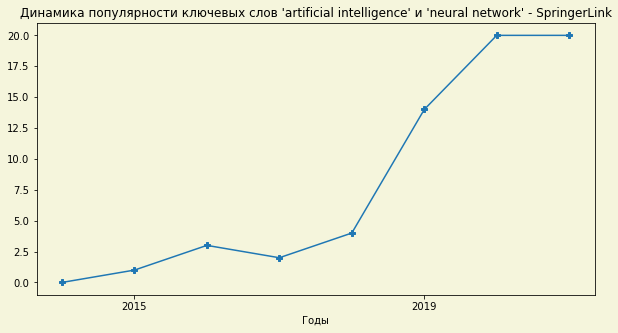

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
#plt.figure(figsize=(10, 5))
fig.patch.set_facecolor('beige')
ax.set_facecolor("beige")
x = np.arange(2021 - len(num_occur) , 2022)
if len(num_occur) < len(x):
    num_occur = [0] + num_occur

plt.plot(x, num_occur[0:], 'P-')
ax.set_xticks(np.arange(x[0] + 1, 2022, 4))

ax.set_facecolor("beige")
fig.patch.set_facecolor('beige')
ax.set_xlabel('Годы')
ax.set_title('Динамика популярности ключевых слов \'' + keywords[1:-1] + '\' и \'' + keywords2[1:-1] + '\' - SpringerLink')


## Анализ по одному ключевому слову

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
#plt.figure(figsize=(10, 5))
fig.patch.set_facecolor('beige')
ax.set_facecolor("beige")
x = np.arange(2021 - len(num_occur) , 2022)
print(x)
if len(num_occur) < len(x):
    num_occur = [0] + num_occur
#x = [x[i] + 2000 for i in range(len(x))]
plt.plot(x, num_occur[0:], 'P-')
ax.set_xticks(np.arange(x[0] + 1, 2022, 1))
#ax.set_yticklabels(most_com_words[begin:end])
# ax.set_xticks(most_com_index[begin:end])
# ax.set_xticklabels(most_com_index[begin:end])
#ax.invert_yaxis()  # labels read top-to-bottom
ax.set_facecolor("beige")
fig.patch.set_facecolor('beige')
ax.set_xlabel('Годы')
ax.set_title('Динамика популярности ключевого слова \'' + keywords[1:-1] + '\' - SpringerLink')


## Изменение формата даты

In [10]:
with sq.connect("E:\\frontier.db") as con:
   # print(34)
    cur = con.cursor()
    cur.execute("""CREATE TABLE IF NOT EXISTS SpringerLink (
    name TEXT,
    data TEXT,
    keywords TEXT,
    url TEXT)
    """)
    cur.execute('Select data From SpringerLink')
    result = cur.fetchall()
    
    #DELETE FROM SpringerLink WHERE keywords = 'NONE'
    
#     for i in range(len(all_title)):
#         #print(i)
#       #  print(all_title[i], all_time_pub[i], all_keywords_join[i])
#         cur.execute("""INSERT INTO articles(name, data, keywords, url)
#            VALUES(?, ?, ?, ?)""", (all_title[i], all_time_pub[i], all_keywords_join[i], links_DB[i]))

len(result)        

135163

In [11]:
result[0][0]

'28 September 2020'

In [12]:
new_data = []
month = {'January':'01',
        'February':'02',
        'March':'03',
        'April':'04',
        'May':'05',
        'June':'06',
        'July':'07',
        'August':'08',
        'September':'09',
        'October':'10',
        'November':'11',
        'December':'12'}

def get_data_from_string(string):
    data = ''
    data += string[-4:] + '-'
    e = re.compile('\d')
    
    if e.findall(string[0]):
        data += month[string[3:-5]] +'-'
        data += string[:2]
    else:
        data += month[string[:-5]]
    
    
    return data


for i in range(len(result)):
    new_data.append(get_data_from_string(result[i][0]))

In [13]:
len(new_data), new_data

(135163,
 ['2020-09-28',
  '2020-06-21',
  '2020-04-22',
  '2020-04-20',
  '2020-08-19',
  '2020-06-09',
  '2020-08-25',
  '2020-08-12',
  '2020-08-08',
  '2020-10-29',
  '2020-10-01',
  '2020-10-07',
  '2021-04-08',
  '2020-10-29',
  '2020-08-14',
  '2020-09-07',
  '2020-08-17',
  '2020-08-25',
  '2021-05-13',
  '2020-07-08',
  '2020-10-01',
  '2020-09-11',
  '2020-09-22',
  '2020-09-10',
  '2020-09-19',
  '2020-05-21',
  '2020-08-19',
  '2021-05-13',
  '2020-09-18',
  '2020-09-19',
  '2020-08-17',
  '2020-03-04',
  '2020-07-07',
  '2020-09-18',
  '2020-04-07',
  '2020-10-17',
  '2020-05-16',
  '2020-09-21',
  '2020-07-27',
  '2019-08-23',
  '2020-09-29',
  '2020-07-17',
  '2020-10-10',
  '2020-09-07',
  '2021-03-22',
  '2020-03-02',
  '2020-09-18',
  '2019-08-21',
  '2020-09-02',
  '2020-08-22',
  '2020-11-19',
  '2020-06-30',
  '2020-10-06',
  '2020-05-20',
  '2020-10-16',
  '2020-04-29',
  '2020-09-10',
  '2020-04-22',
  '2019-07-15',
  '2020-09-26',
  '2021-01-04',
  '2021-05-13',

In [15]:
# %%time

import sqlite3 as sq

with sq.connect("E:\\frontier.db") as con:
    cur = con.cursor()
    cur.execute("""CREATE TABLE IF NOT EXISTS SpringerLink (
    name TEXT,
    data TEXT,
    keywords TEXT,
    url TEXT)
    """)
    cur.execute("Select _rowid_ from SpringerLink")
    ID = cur.fetchall()
    
    for i in range(len(ID)):
        #print(i)
      #  print(all_title[i], all_time_pub[i], all_keywords_join[i])
        cur.execute("""UPDATE SpringerLink 
        SET data=? where _rowid_=?""", (new_data[i], ID[i][0]))
        if i % 1000 == 0:
            print(i, end=' ')

    